In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df_raw = pd.read_csv("rawdata/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace =True)

In [9]:
df_raw = pd.get_dummies(df_raw)

In [11]:
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [14]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

df_train_y = df_train["BAD"]
df_train_x = df_train.drop(["BAD"], axis = 1)
df_test_y = df_test["BAD"]
df_test_x = df_test.drop(["BAD"], axis = 1)

In [16]:
df_train_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.0,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.0,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.0,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.0,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.0,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0


In [19]:
knn_uncustomized = KNN()
knn_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: %.3f" % knn_uncustomized.score(df_train_x, df_train_y))
print("Accuracy on test set:\t %.3f" % knn_uncustomized.score(df_test_x, df_test_y))

Accuracy on training set: 0.916
Accuracy on test set:	 0.908


In [24]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNN(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))

df_score_knn = pd.DataFrame()
df_score_knn["n_neighbors"] = para_n_neighbors
df_score_knn["TrainScore"] = train_score
df_score_knn["TestScore"] = test_score

df_score_knn.round(3)

,n_neighbors,TrainScore,TestScore
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


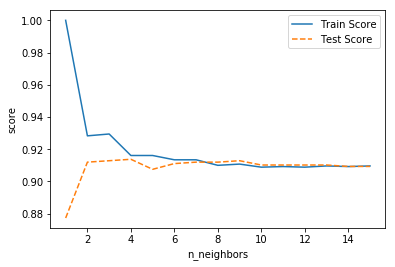

In [22]:
plt.plot(para_n_neighbors, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_neighbors, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_neighbors")
plt.legend()

In [23]:
opt_n = 3

In [16]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,11)] * 2

para_weights = (["uniform"] * 10) + (["distance"] * 10)

for (v_n_neighbors, v_weight) in zip(para_n_neighbors, para_weights):
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors, weights = v_weight)
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_weight = pd.DataFrame()
df_score_weight["Neighbors"] = para_n_neighbors
df_score_weight["Weights"] = para_weights
df_score_weight["TrainScore"] = train_score
df_score_weight["TestScore"] = test_score

df_score_weight.round(3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNN(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.717
1,2,0.851,0.821
2,3,0.843,0.792
3,4,0.825,0.821
4,5,0.820,0.803
5,6,0.822,0.839
6,7,0.819,0.828
7,8,0.806,0.835
8,9,0.810,0.832
9,10,0.805,0.839


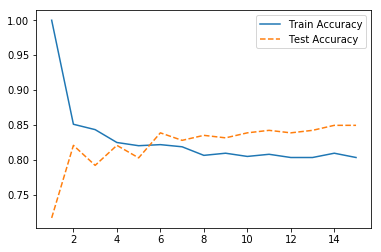

In [19]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNN(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)